"""
written by EthanJ
"""

In [2]:
# crwaling library import
import requests

import pandas as pd
import numpy as np

## 한국은행 Open API 서비스

- 경제 통계 OpenAPI는 한국은행이 작성·수집한 경제통계 정보를 보다 편리하게 활용할 수 있도록 외부에 공개한 인터페이스 입니다.

- 한국은행 Open API를 사용하기 위해서는 `인증키` 발급 필수 > 회원가입 후 email을 통해 확인 가능

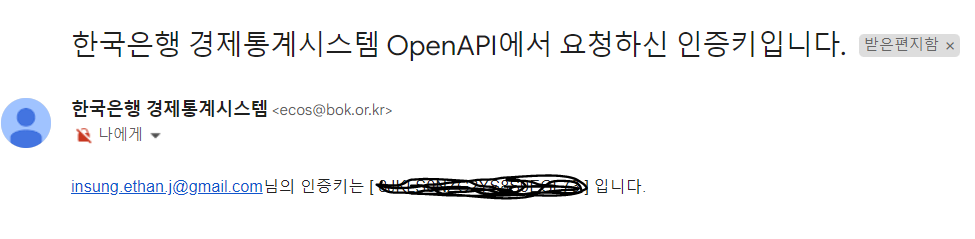

<br>

- 한국은행 Open API 서비스 목록 > 이 중 기간별 데이터 조회를 위해 `통계 조회 조건 설정` 서비스 사용

![services](https://github.com/insung-ethan-j/Python_API_Crawling_Project/blob/087cc52bca911d522d917b924dbd24a24695df34/img/API_services.png?raw=True)

<br>

- 기간별 조회를 위해 `개발 명세서`탭의 `통계 조회 조건 설정`을 확인

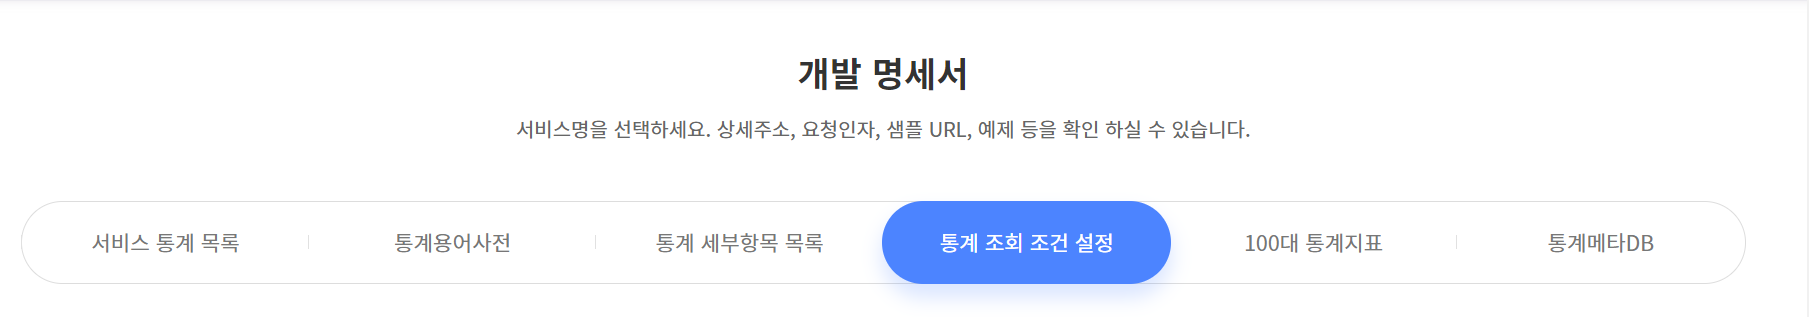

<br>

- API에서 사용하는 parameter 목록 체크

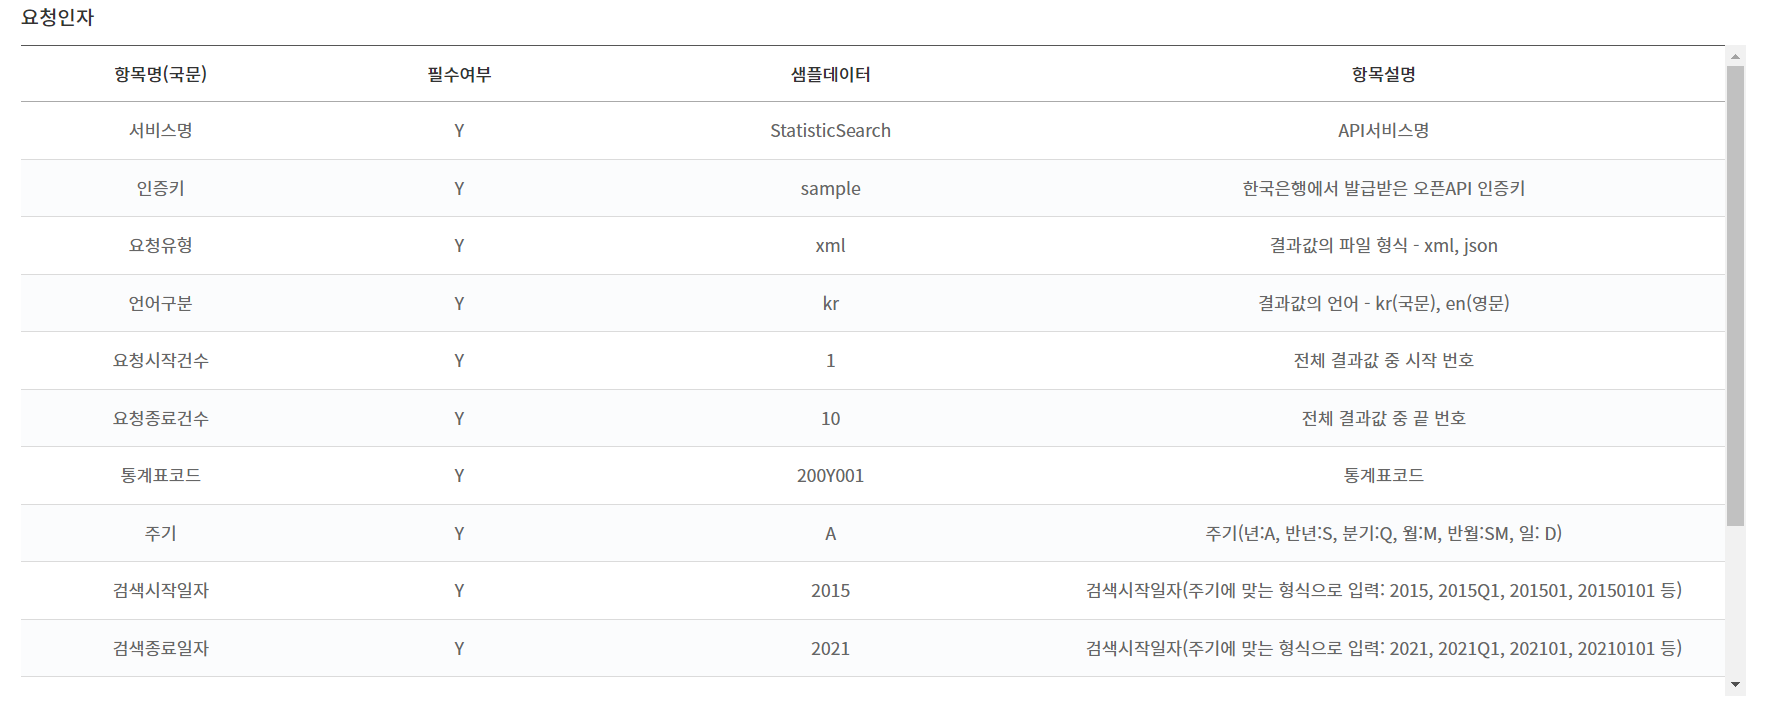

<br>

- `샘플테스트`를 통해 원하는 data가 출력될 수 있는 API 접근 url 얻을 수 있다.

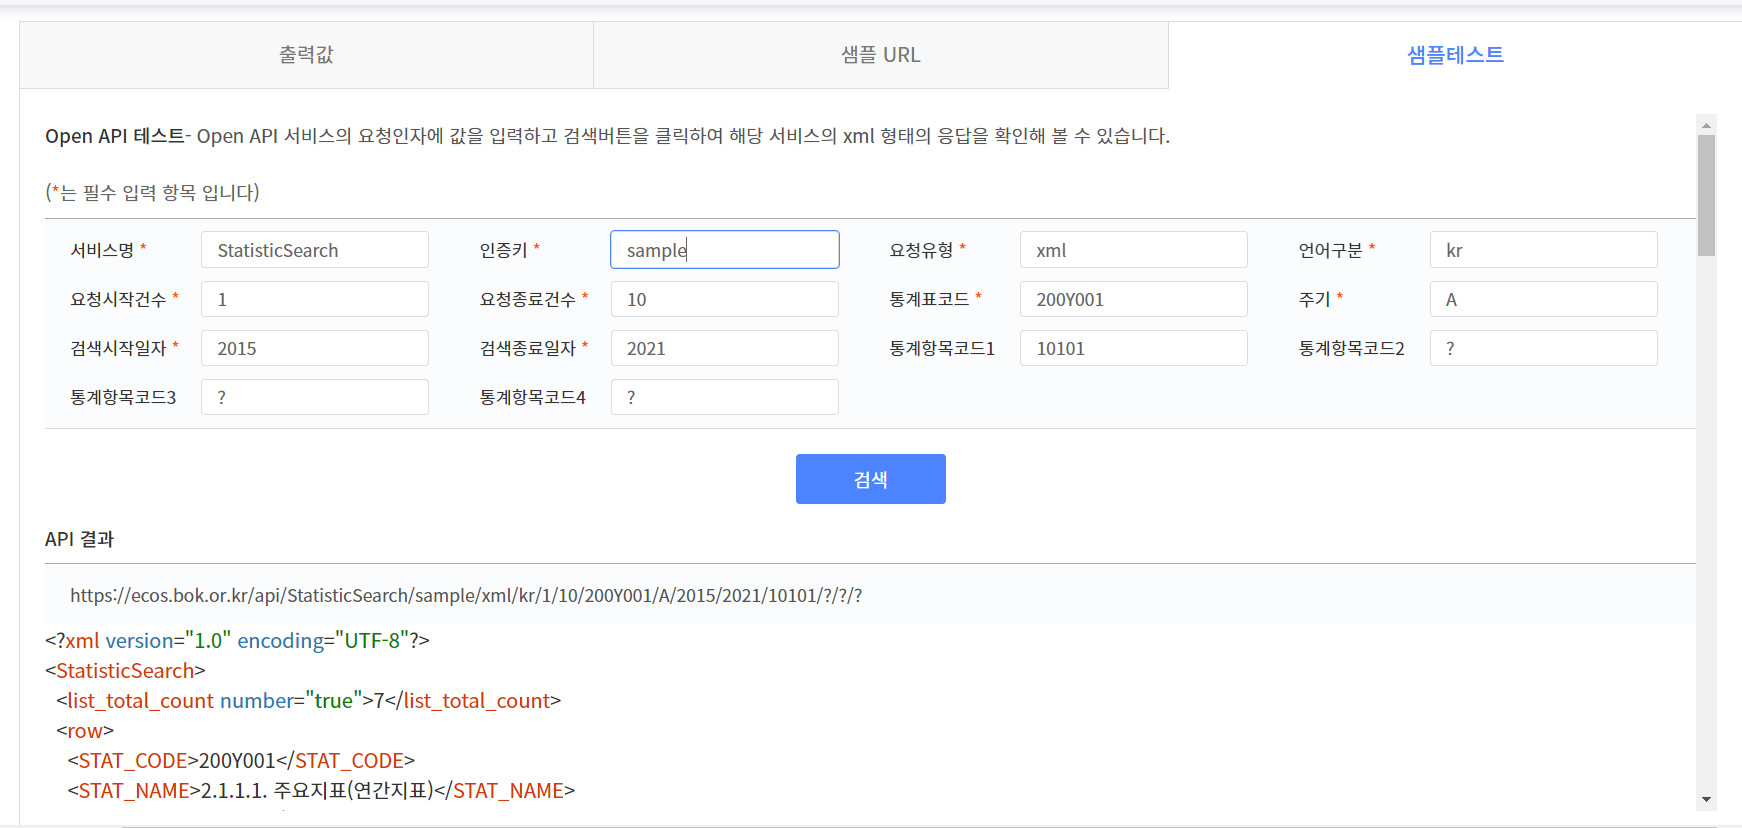

<br>

- `통계표코드` 및 `통계항목코드` 확인을 위해 `통계코드검색`탭 접근

<br>

- `경제활동인구` > `계절조정` 데이터 통계코드 확인

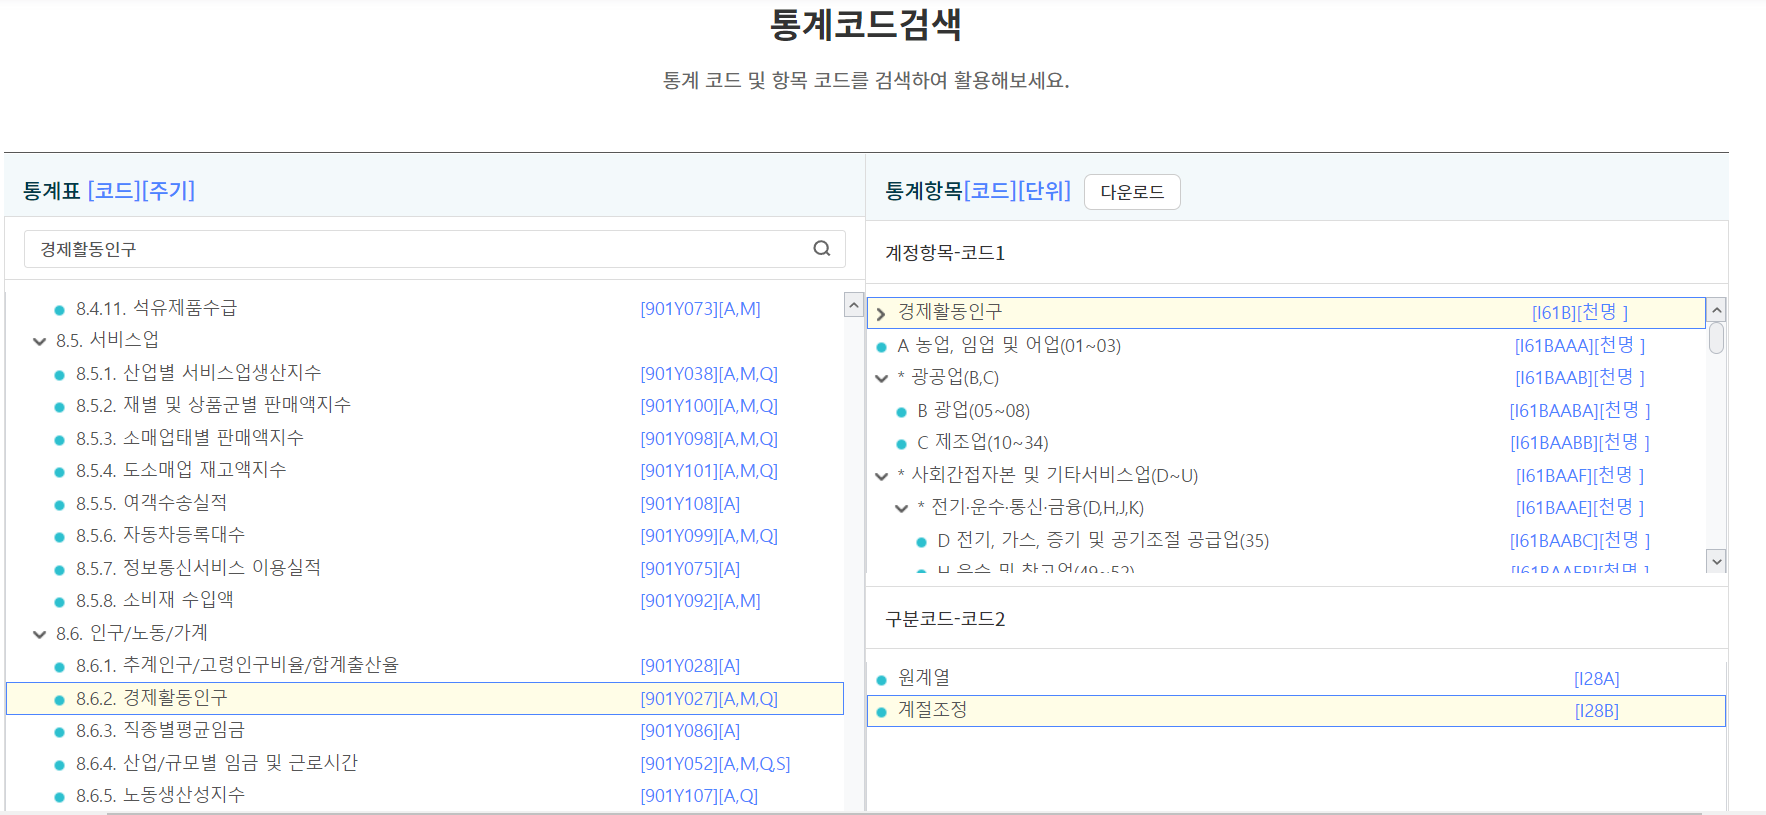

- 원하는 parameter, `통계항목코드` 입력 후 API 결과 확인 > `TIME`, `DATA_VALUE` 출력 확인 완료 > 해당 API 접근 url 사용

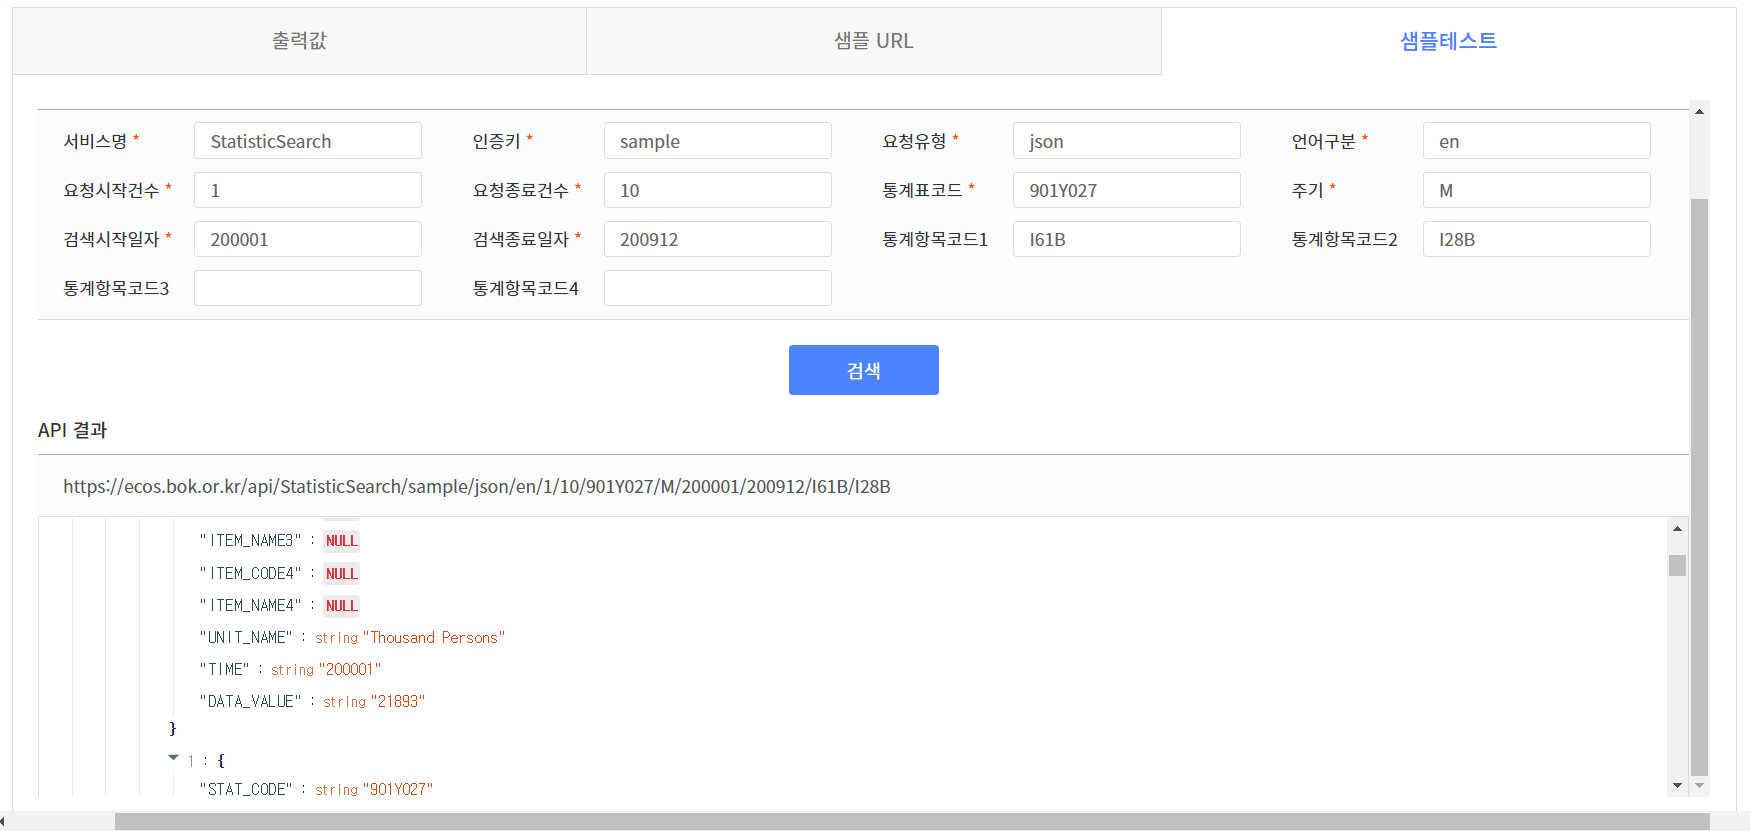

In [3]:
url_list = list()

# 테스트 결과: 한 번에 10개년 단위로만 출력 가능 > 10년 단위로 기간 설정 > url_list에 url 문자열 저장
url1 = 'https://ecos.bok.or.kr/api/StatisticSearch/8JKLS0NZG2YS8S9EGL73/json/en/1/261/901Y027/M/200001/200912/I61B/I28B/'
url2 = 'https://ecos.bok.or.kr/api/StatisticSearch/8JKLS0NZG2YS8S9EGL73/json/en/1/261/901Y027/M/201001/201912/I61B/I28B/'
url3 = 'https://ecos.bok.or.kr/api/StatisticSearch/8JKLS0NZG2YS8S9EGL73/json/en/1/261/901Y027/M/202001/202209/I61B/I28B/'

url_list = [url1, url2, url3]

# 각 10개년 DataFrame을 저장 할 'working_pop_df_list' 생성
working_pop_df_list = []

<br>

- `requests.get(url)` method로 data response

In [4]:
my_response = requests.get(url_list[0])

my_response

<Response [200]>

<br>

- response된 API json code를 pandas DataFrame화 > `pd.DataFrame(response.json())`

In [5]:
working_pop_df = pd.DataFrame(my_response.json())

working_pop_df

,StatisticSearch
list_total_count,120
row,"[{'STAT_CODE': '901Y027', 'STAT_NAME': '8.6.2...."


<br>

- 먼저 'list_total_count' row index 제거

In [6]:
working_pop_df = working_pop_df.drop('list_total_count')

working_pop_df

,StatisticSearch
row,"[{'STAT_CODE': '901Y027', 'STAT_NAME': '8.6.2...."


<br>

- row data안의 code 확인 위해 `df.to_dict()` method 사용

In [7]:
working_pop_dict = working_pop_df.to_dict()

working_pop_dict

{'StatisticSearch': {'row': [{'STAT_CODE': '901Y027',
    'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
    'ITEM_CODE1': 'I61B',
    'ITEM_NAME1': 'Economically Active Pop.',
    'ITEM_CODE2': 'I28B',
    'ITEM_NAME2': 'Seasonal Adjustment',
    'ITEM_CODE3': None,
    'ITEM_NAME3': None,
    'ITEM_CODE4': None,
    'ITEM_NAME4': None,
    'UNIT_NAME': 'Thousand Persons',
    'TIME': '200001',
    'DATA_VALUE': '21893'},
   {'STAT_CODE': '901Y027',
    'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
    'ITEM_CODE1': 'I61B',
    'ITEM_NAME1': 'Economically Active Pop.',
    'ITEM_CODE2': 'I28B',
    'ITEM_NAME2': 'Seasonal Adjustment',
    'ITEM_CODE3': None,
    'ITEM_NAME3': None,
    'ITEM_CODE4': None,
    'ITEM_NAME4': None,
    'UNIT_NAME': 'Thousand Persons',
    'TIME': '200002',
    'DATA_VALUE': '21915'},
   {'STAT_CODE': '901Y027',
    'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
    'ITEM_CODE1': 'I61B',
    'ITEM_NAME1': 'Economically

<br>

- dict의 'StatisticSearch'key의 value안에 > 'row'key의 value list에 data 위치함 > `working_pop_dict['StatisticSearch']['row']` indexing 

In [8]:
working_pop_list = working_pop_dict['StatisticSearch']['row']

working_pop_list

[{'STAT_CODE': '901Y027',
  'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
  'ITEM_CODE1': 'I61B',
  'ITEM_NAME1': 'Economically Active Pop.',
  'ITEM_CODE2': 'I28B',
  'ITEM_NAME2': 'Seasonal Adjustment',
  'ITEM_CODE3': None,
  'ITEM_NAME3': None,
  'ITEM_CODE4': None,
  'ITEM_NAME4': None,
  'UNIT_NAME': 'Thousand Persons',
  'TIME': '200001',
  'DATA_VALUE': '21893'},
 {'STAT_CODE': '901Y027',
  'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
  'ITEM_CODE1': 'I61B',
  'ITEM_NAME1': 'Economically Active Pop.',
  'ITEM_CODE2': 'I28B',
  'ITEM_NAME2': 'Seasonal Adjustment',
  'ITEM_CODE3': None,
  'ITEM_NAME3': None,
  'ITEM_CODE4': None,
  'ITEM_NAME4': None,
  'UNIT_NAME': 'Thousand Persons',
  'TIME': '200002',
  'DATA_VALUE': '21915'},
 {'STAT_CODE': '901Y027',
  'STAT_NAME': '8.6.2. Summary of Economically Active Pop.',
  'ITEM_CODE1': 'I61B',
  'ITEM_NAME1': 'Economically Active Pop.',
  'ITEM_CODE2': 'I28B',
  'ITEM_NAME2': 'Seasonal Adjustment',
  'ITEM_

<br>

- `DataFrame`화 시킨 뒤 > 원하는 data가 들어있는 'Time', 'DATA_VALUE' columns만 추출

In [9]:
working_pop_df = pd.DataFrame(working_pop_list)

this_df = working_pop_df[['TIME', 'DATA_VALUE']]

this_df

,TIME,DATA_VALUE
0,200001,21893
1,200002,21915
2,200003,21959
3,200004,21971
4,200005,22076
...,...,...
115,200908,24669
116,200909,24686
117,200910,24648
118,200911,24686


<br>

- `url_list`의 3개 item에 대해 반복문 수행, 각각 결과 DataFrame은 `working_pop_df_list`에 `.append()`로 추가

In [10]:
for i in range(3):
    my_response = requests.get(url_list[i])

    working_pop_df = pd.DataFrame(my_response.json())

    working_pop_dict = working_pop_df.to_dict()

    working_pop_list = working_pop_dict['StatisticSearch']['row']

    working_pop_df = pd.DataFrame(working_pop_list)

    this_df = working_pop_df[['TIME', 'DATA_VALUE']]
    
    working_pop_df_list.append(this_df)

<br>

- `pd.concat([])` method로 `working_pop_df_list`의 item DataFrame들을 연결

In [11]:
working_pop_df = pd.concat([working_pop_df_list[0], working_pop_df_list[1], working_pop_df_list[2]])

<br>

- 최종 결과 `df.to_csv()` method로 `.csv` 파일 형식 저장

In [12]:
working_pop_df.to_csv('C:/Users/EthanJ/develop/Python_API_Crawling_Project/working_pop.csv')

`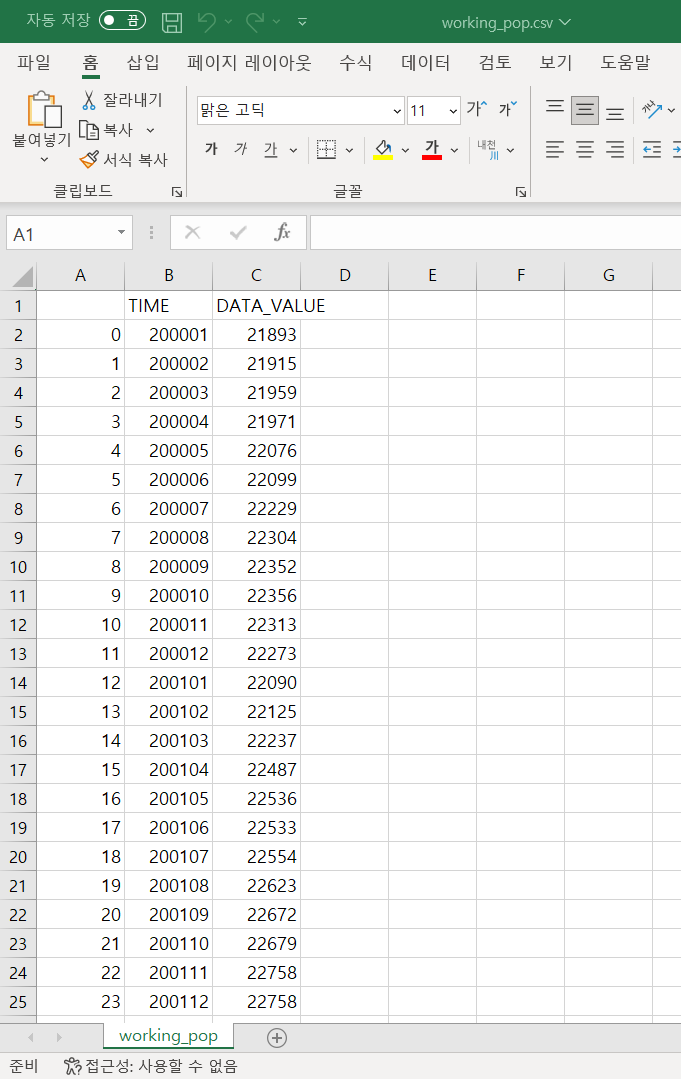